Import des modules et des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/houses_Madrid.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

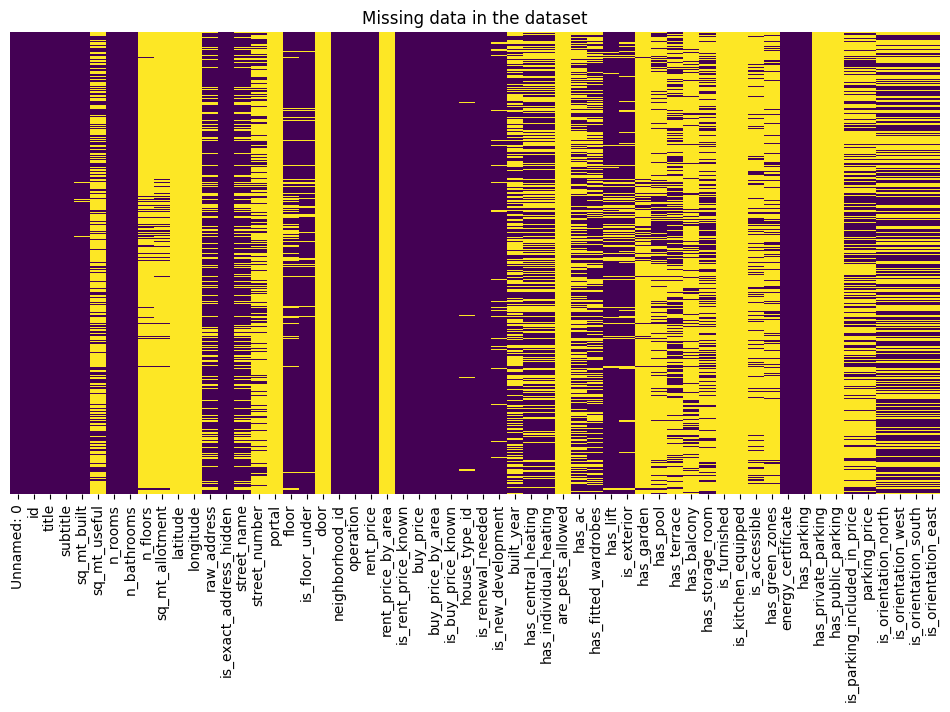

In [3]:
# show null graph
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing data in the dataset')
plt.show()